Total number of users (tu): 50
Total number of columns (tni): 10

Number of ratings for each item:
The Shawshank Redemption                             44
The Godfather                                        49
The Dark Knight                                      48
The Godfather Part II                                43
12 Angry Men                                         45
The Lord of the Rings: The Return of the King        44
Schindler&apos;s List                                38
Pulp Fiction                                         42
The Lord of the Rings: The Fellowship of the Ring    43
Il buono, il brutto, il cattivo                      43
dtype: int64

Number of ratings for each user:
0      9
1      7
2     10
3     10
4      9
5      8
6     10
7      8
8     10
9      9
10     9
11     7
12    10
13     9
14    10
15     8
16     9
17     9
18    10
19     9
20    10
21    10
22     9
23     9
24     9
25     9
26     8
27     9
28    10
29     5
30     9
31     9
32    

<ipython-input-4-e5354f545799>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: value_mapping.get(x, x) if pd.notna(x) and isinstance(x, (int, float)) else x)
<ipython-input-4-e5354f545799>:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if pd.notna(x) and isinstance(x, (int, float)) else x)


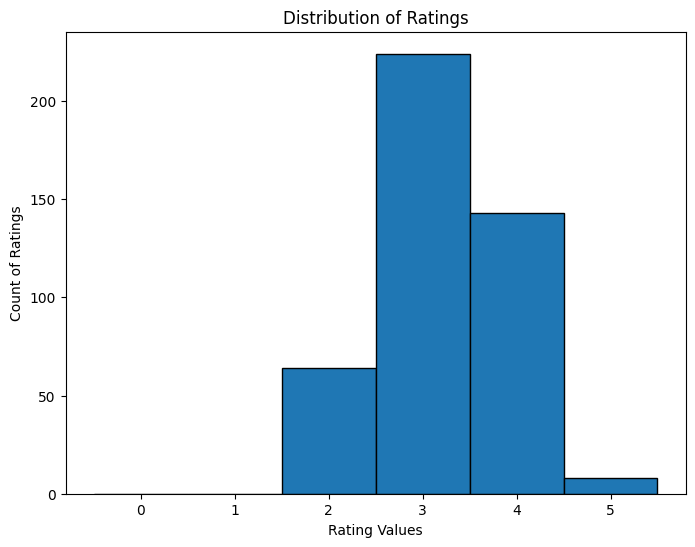


Matrix Sparsity: 12.20%

Mean Rating: 3.22
Standard Deviation of Ratings: 0.71
No significant bias detected.

The target items '['Schindler&apos;s List', 'Pulp Fiction']' and their ratings have been saved to 'target_items.csv'.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('imdb_user_ratings.csv')

# Step 2: Count the total number of users
if 'UserID' in df.columns:
    tu = df['UserID'].nunique()  # Count the unique UserIDs (distinct users)
else:
    tu = len(df)  # Count the total number of rows (users)

print(f"Total number of users (tu): {tu}")

# Step 3: Count the total number of columns (items)
# Exclude the first column (UserID or user name column)
tni = df.shape[1] - 1  # Number of columns in the dataset (excluding the UserID or first column)
print(f"Total number of columns (tni): {tni}")

# Step 4: Define a mapping dictionary for specific values (adjust ratings as per requirements)
value_mapping = {
    7: 2,
    8: 3,
    9: 4,
    10: 5
}

# Step 5: Apply the mapping only on numeric columns, ensuring all results are integers
df = df.applymap(lambda x: value_mapping.get(x, x) if pd.notna(x) and isinstance(x, (int, float)) else x)

# Step 6: Convert all values to integers (except NaN values)
df = df.applymap(lambda x: int(x) if pd.notna(x) and isinstance(x, (int, float)) else x)

# Step 7: Count the number of ratings for each item (product)
# Exclude the first column (UserID or user names) for counting ratings for products
ratings_count_per_item = df.iloc[:, 1:].notna().sum()

# Step 8: Count the number of ratings for each user
# Exclude the first column (UserID or user names) for counting ratings for users
ratings_count_per_user = df.iloc[:, 1:].notna().sum(axis=1)

# Step 9: Print the count of ratings for each item and user
print("\nNumber of ratings for each item:")
print(ratings_count_per_item)

print("\nNumber of ratings for each user:")
print(ratings_count_per_user)

# Step 10: Save the modified dataset to a new CSV file
df.to_csv('modified_imdb_user_ratings.csv', index=False)
print("\nThe modified dataset has been saved to 'modified_imdb_user_ratings.csv'.")

# Step 11: Draw the distribution of ratings (count of ratings against rating values)
ratings_flat = df.iloc[:, 1:].values.flatten()
ratings_flat = ratings_flat[~pd.isna(ratings_flat)]  # Remove NaN values
ratings_flat = ratings_flat.astype(int)

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings_flat, bins=np.arange(-0.5, 6.5, 1), edgecolor='black', align='mid')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Values')
plt.ylabel('Count of Ratings')
plt.xticks(np.arange(0, 6, 1))
plt.show()

# Step 12: Check if the matrix is sparse
total_elements = df.iloc[:, 1:].size  # Total number of elements in the matrix
non_null_elements = df.iloc[:, 1:].notna().sum().sum()  # Total number of non-NaN values
sparsity = (1 - non_null_elements / total_elements) * 100
print(f"\nMatrix Sparsity: {sparsity:.2f}%")

# Step 13: Check for bias
mean_rating = np.mean(ratings_flat)
std_rating = np.std(ratings_flat)
print(f"\nMean Rating: {mean_rating:.2f}")
print(f"Standard Deviation of Ratings: {std_rating:.2f}")

if mean_rating > 3.5:
    print("Bias detected: Ratings are positively skewed.")
elif mean_rating < 2.5:
    print("Bias detected: Ratings are negatively skewed.")
else:
    print("No significant bias detected.")

# Step 14: Extract the two lowest-rated items ("Schindler's List" and "Pulp Fiction")
target_items = ["Schindler&apos;s List", "Pulp Fiction"]

# Ensure the target items exist in the dataset
if all(item in df.columns for item in target_items):
    target_df = df[['User'] + target_items]  # Include UserID and the target items
else:
    raise ValueError("One or both target items are missing from the dataset columns.")

# Step 15: Save the extracted data to a new CSV file
target_df.to_csv('target_items.csv', index=False)

print(f"\nThe target items '{target_items}' and their ratings have been saved to 'target_items.csv'.")

In [5]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('modified_imdb_user_ratings.csv')

# Step 2: Calculate the average rating for each item in the dataset
if 'User' in df.columns:
    average_ratings_all = df.drop(columns=['User']).mean()
else:
    raise ValueError("'User' column is missing from the dataset.")

print("\nAverage ratings for all items:")
for item, avg in average_ratings_all.items():
    print(f"{item}: {avg:.2f}")

# Step 3: Extract the two lowest-rated items ("Schindler's List" and "Pulp Fiction")
target_items = ["Schindler&apos;s List", "Pulp Fiction"]

if not all(item in df.columns for item in target_items):
    raise ValueError("One or both target items are missing from the dataset columns.")

target_df = df[['User'] + target_items]

# Step 4: Calculate the average rating for target items
average_ratings_target = target_df[target_items].mean()
print("\nAverage ratings for the target items:")
for item, avg in average_ratings_target.items():
    print(f"{item}: {avg:.2f}")

# Step 5: Replace missing ratings with the mean for target items
for item in target_items:
    target_df[item] = target_df[item].fillna(average_ratings_target[item])

print("\nMissing ratings have been replaced with mean values.")

# Step 6: Calculate differences between ratings and mean ratings for all items
for item in df.columns:
    if item != 'User':  # Skip the 'User' column
        diff_column_name = f"{item}_Difference"
        df[diff_column_name] = df[item] - average_ratings_all[item]

# Step 7: Compute the covariance matrix
items = df.drop(columns=['User']).columns
cov_matrix = df[items].cov()

print("\nCovariance Matrix:")
print(cov_matrix)
cov_matrix.to_csv('covariance_matrix.csv')
print("\nThe covariance matrix has been saved to 'covariance_matrix.csv'.")

# Step 8: Identify top 5 and top 10 peers for target items
print("\nIdentifying top peers for target items...")
top_peers = {}

for target in target_items:
    sorted_peers = cov_matrix[target].drop(target).sort_values(ascending=False)
    top_peers[target] = {
        'Top 5 Peers': sorted_peers.head(5).index.tolist(),
        'Top 10 Peers': sorted_peers.head(10).index.tolist()
    }
    print(f"\nTop 5 peers for '{target}': {top_peers[target]['Top 5 Peers']}")
    print(f"Top 10 peers for '{target}': {top_peers[target]['Top 10 Peers']}")

# Save peers to a text file
with open('top_peers.txt', 'w') as file:
    for target, peers in top_peers.items():
        file.write(f"Top peers for {target}:\n")
        file.write(f"Top 5 Peers: {', '.join(peers['Top 5 Peers'])}\n")
        file.write(f"Top 10 Peers: {', '.join(peers['Top 10 Peers'])}\n\n")

print("\nThe top peers have been saved to 'top_peers.txt'.")

# Step 9: Function to predict missing values for target items
def predict_missing_values(original_df, reduced_space, target_item):
    """
    Predicts only the missing values for the target item using the ratings of its peers.

    Args:
        original_df (pd.DataFrame): The original dataset with missing values for the target item.
        reduced_space (pd.DataFrame): Reduced space containing ratings for the peers.
        target_item (str): Name of the target item to predict ratings for.

    Returns:
        pd.DataFrame: DataFrame containing only the predicted missing values.
    """
    peers_columns = [col for col in reduced_space.columns if col != 'User']
    predictions = []

    for index, row in reduced_space.iterrows():
        if pd.isna(original_df.loc[index, target_item]):
            predicted_value = row[peers_columns].mean(skipna=True)
            predictions.append({"User": original_df.loc[index, 'User'], target_item: predicted_value})

    return pd.DataFrame(predictions)

# Step 10: Predict missing values using top 5 and top 10 peers
for peer_count, count_name in [('Top 5 Peers', 'top5'), ('Top 10 Peers', 'top10')]:
    for target in target_items:
        peers = top_peers[target][peer_count]
        reduced_space = df[['User'] + peers]
        predictions = predict_missing_values(df, reduced_space, target)

        # Print predictions for verification
        print(f"\nPredicted values for missing entries in '{target}' using {peer_count}:")
        print(predictions)

        # Save predictions to a CSV file
        predictions.to_csv(f'predicted_{count_name}_{target}.csv', index=False)
        print(f"\nPredicted values using {peer_count} have been saved to 'predicted_{count_name}_{target}.csv'.")

# Step 11: Save the updated dataset with predictions
df.to_csv('updated_dataset_with_predictions.csv', index=False)
print("\nThe updated dataset with predictions has been saved to 'updated_dataset_with_predictions.csv'.")


Average ratings for all items:
The Shawshank Redemption: 3.39
The Godfather: 3.57
The Dark Knight: 3.46
The Godfather Part II: 3.37
12 Angry Men: 3.64
The Lord of the Rings: The Return of the King: 3.55
Schindler&apos;s List: 3.58
Pulp Fiction: 2.40
The Lord of the Rings: The Fellowship of the Ring: 2.47
Il buono, il brutto, il cattivo: 2.65

Average ratings for the target items:
Schindler&apos;s List: 3.58
Pulp Fiction: 2.40

Missing ratings have been replaced with mean values.

Covariance Matrix:
                                                    The Shawshank Redemption  \
The Shawshank Redemption                                            0.242600   
The Godfather                                                      -0.007198   
The Dark Knight                                                    -0.034330   
The Godfather Part II                                               0.056899   
12 Angry Men                                                        0.051829   
The Lord of the

<ipython-input-5-70c834ce5bde>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df[item] = target_df[item].fillna(average_ratings_target[item])



Predicted values for missing entries in 'Schindler&apos;s List' using Top 10 Peers:
       User  Schindler&apos;s List
0    User_1               1.536246
1    User_2               1.411416
2    User_6               1.314023
3    User_8               2.161416
4   User_12               0.748752
5   User_18               1.980690
6   User_26               1.425135
7   User_27               1.202912
8   User_28               1.425135
9   User_44               2.267045
10  User_48               1.869579
11  User_50               1.647357

Predicted values using Top 10 Peers have been saved to 'predicted_top10_Schindler&apos;s List.csv'.

Predicted values for missing entries in 'Pulp Fiction' using Top 10 Peers:
      User  Pulp Fiction
0  User_16      1.385944
1  User_20      1.719277
2  User_23      1.274833
3  User_24      1.830389
4  User_30      1.944352
5  User_32      1.719277
6  User_35      1.608166
7  User_44      1.916126

Predicted values using Top 10 Peers have been saved to 'p